<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Data Science and Business Analytics</font></center>
<center><font size=6>Ensemble Techniques and Model Tuning</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

# **Problem Statement**

## Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# **Importing necessary libraries**

In [2]:
# Ignore any warning
import warnings
warnings.filterwarnings("ignore")

# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.2.2 scikit-learn==1.3.2 matplotlib==3.8.0 seaborn==0.13.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# Ignore any warning
import warnings

warnings.filterwarnings("ignore")

# Libraries for reading and manipulating data
import numpy as np
import pandas as pd
import plotly as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# To oversample and undersample data
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

# **Loading the dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv('/content/drive/MyDrive/PG: Data Science & BA/Projects/Project 5: Ensemble Techniques, Model Tuning: Easy Visa/EasyVisa.csv')

In [7]:
data=df.copy()

# **Overview of the Dataset**

* Observations

* Sanity checks

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
df.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


# <a name='link2'>**Exploratory Data Analysis (EDA)**</a>

Univariate Analysis

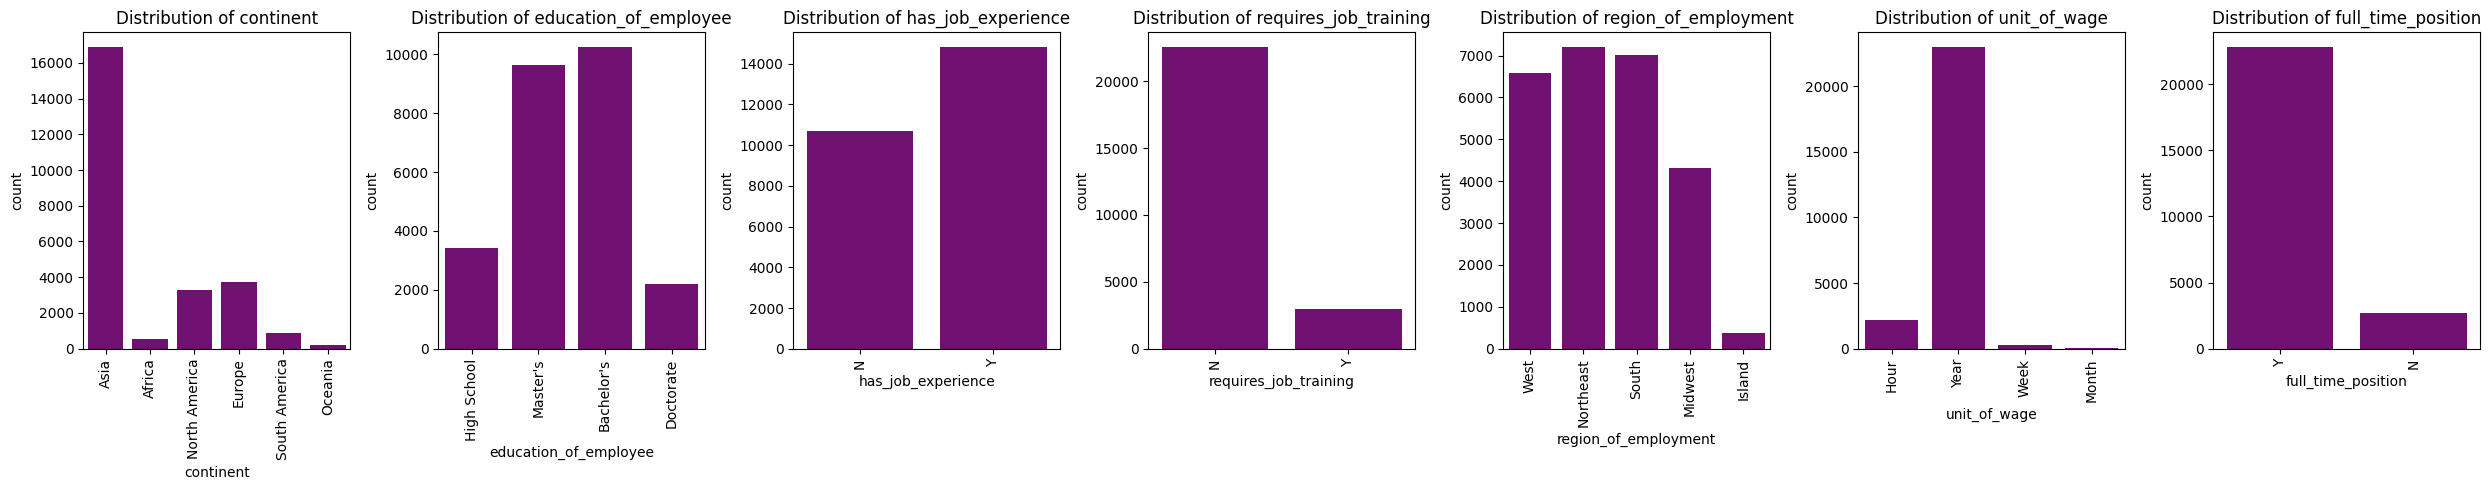

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['continent', 'education_of_employee', 'has_job_experience',
                     'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position']

fig, axes = plt.subplots(1, 7, figsize=(25,5))

sns.countplot(data=df, x=categorical_cols[0], ax=axes[0], color="purple")
sns.countplot(data=df, x=categorical_cols[1], ax=axes[1], color="purple")
sns.countplot(data=df, x=categorical_cols[2], ax=axes[2], color="purple")
sns.countplot(data=df, x=categorical_cols[3], ax=axes[3], color="purple")
sns.countplot(data=df, x=categorical_cols[4], ax=axes[4], color="purple")
sns.countplot(data=df, x=categorical_cols[5], ax=axes[5], color="purple")
sns.countplot(data=df, x=categorical_cols[6], ax=axes[6], color="purple")


axes[0].set_title(f'Distribution of {categorical_cols[0]}')
axes[1].set_title(f'Distribution of {categorical_cols[1]}')
axes[2].set_title(f'Distribution of {categorical_cols[2]}')
axes[3].set_title(f'Distribution of {categorical_cols[3]}')
axes[4].set_title(f'Distribution of {categorical_cols[4]}')
axes[5].set_title(f'Distribution of {categorical_cols[5]}')
axes[6].set_title(f'Distribution of {categorical_cols[6]}')

for ax in axes:
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

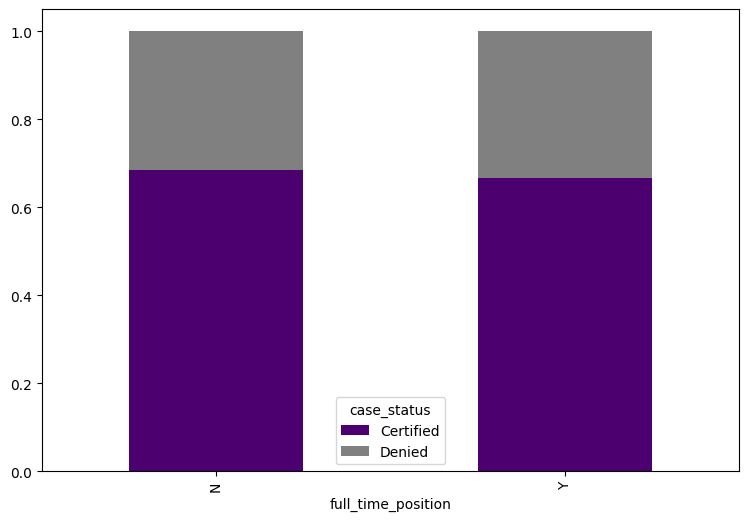

In [8]:
data["full_time_position"] = data["full_time_position"].astype("category")
pd.crosstab(data['full_time_position'], data['case_status'],normalize='index').plot(kind="bar", figsize=(9,6), stacked=True, color= ['#4C0070', 'grey','#1E90FF', '#000080' ,'#9933FF', '#0000CD', '#CC99FF', '#E6CCFF'])
plt.show()

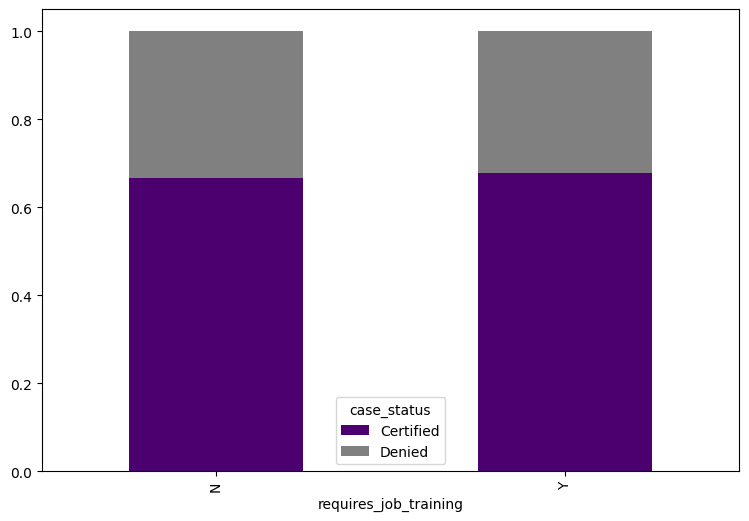

In [9]:
data["requires_job_training"] = data["requires_job_training"].astype("category")
pd.crosstab(data['requires_job_training'], data['case_status'],normalize='index').plot(kind="bar", figsize=(9,6), stacked=True, color= ['#4C0070', 'grey','#1E90FF', '#000080' ,'#9933FF', '#0000CD', '#CC99FF', '#E6CCFF'])
plt.show()

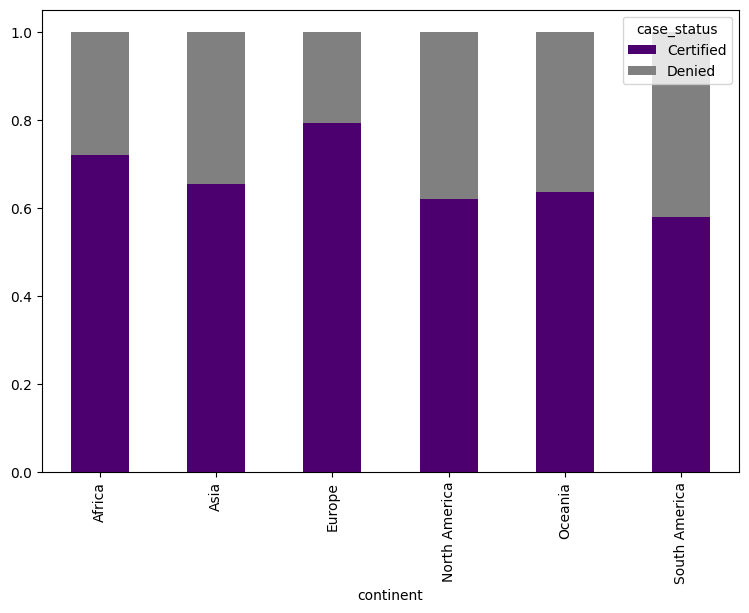

In [10]:
data["continent"] = data["continent"].astype("category")
pd.crosstab(data['continent'], data['case_status'],normalize='index').plot(kind="bar", figsize=(9,6), stacked=True, color= ['#4C0070', 'grey','#1E90FF', '#000080' ,'#9933FF', '#0000CD', '#CC99FF', '#E6CCFF'])
plt.show()

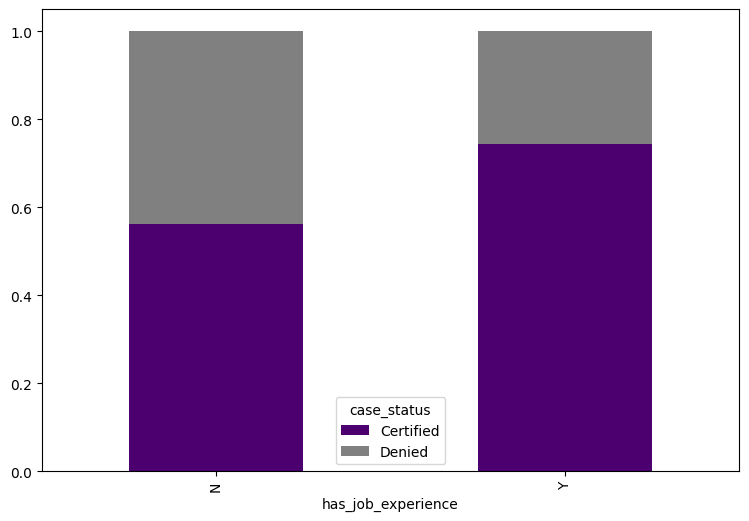

In [11]:
data["has_job_experience"] = data["has_job_experience"].astype("category")
pd.crosstab(data['has_job_experience'], data['case_status'],normalize='index').plot(kind="bar", figsize=(9,6), stacked=True, color= ['#4C0070', 'grey','#1E90FF', '#000080' ,'#9933FF', '#0000CD', '#CC99FF', '#E6CCFF'])
plt.show()

1. What is the distribution of visa case statuses (certified vs. denied)?

In [ ]:
data["case_status"].value_counts()

,count
case_status,
Certified,17018
Denied,8462


In [ ]:
data["case_status"].value_counts(1)
#we should do SMOTE oversampling to "denied"

,proportion
case_status,
Certified,0.667896
Denied,0.332104


In [ ]:
df["case_status"] = df["case_status"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  object  
 1   continent              25480 non-null  object  
 2   education_of_employee  25480 non-null  object  
 3   has_job_experience     25480 non-null  object  
 4   requires_job_training  25480 non-null  object  
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  object  
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  object  
 10  full_time_position     25480 non-null  object  
 11  case_status            25480 non-null  category
dtypes: category(1), float64(1), int64(2), object(8)
memory usage: 2.2+ MB


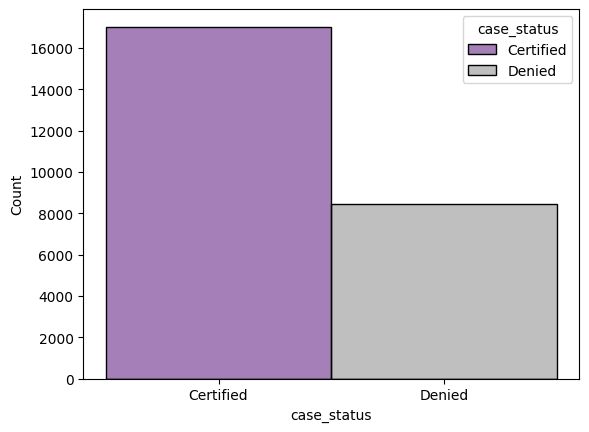

In [ ]:
sns.histplot(data=df, x='case_status', hue='case_status', palette={'Certified':'#4C0070', 'Denied':'grey'})
plt.show()


2. How does the education level of employees impact visa approval rates

In [ ]:
df["education_of_employee"] = df["education_of_employee"].astype("category")

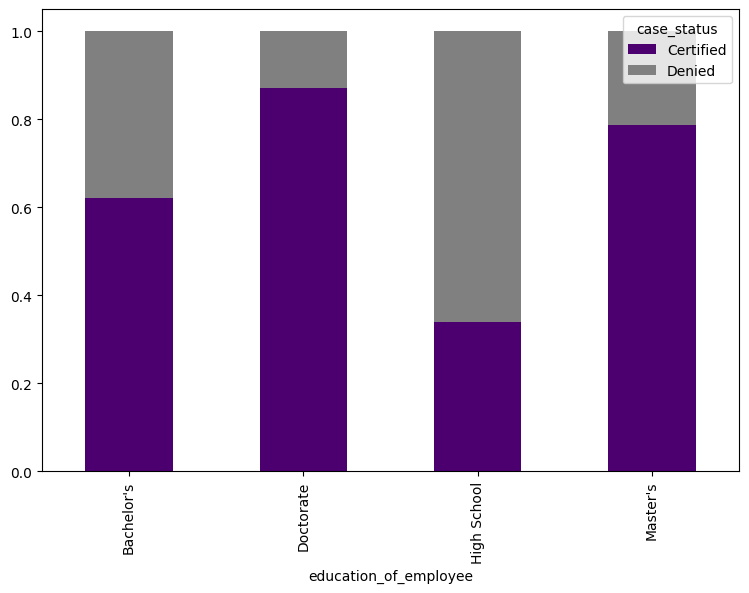

In [ ]:
pd.crosstab(df['education_of_employee'], df['case_status'],normalize='index').plot(kind="bar", figsize=(9,6), stacked=True, color= ['#4C0070', 'grey','#1E90FF', '#000080' ,'#9933FF', '#0000CD', '#CC99FF', '#E6CCFF'])
plt.show()

3. Is there a significant difference in visa approval rates between employees with and without prior job experience?

In [ ]:
prev_exp=df[(df["has_job_experience"]=="Y")]
prev_exp["case_status"].value_counts(1)

,proportion
case_status,
Certified,0.744764
Denied,0.255236


In [ ]:
no_prev_exp=df[(df["has_job_experience"]=="N")]
prev_exp["case_status"].value_counts(1)

,proportion
case_status,
Certified,0.744764
Denied,0.255236


There is a significant difference, if they have a previous job experience it's around 18% more likelly they'll get their visa approved

4. How does the prevailing wage affect visa approval? Do higher wages lead to higher chances of approval?

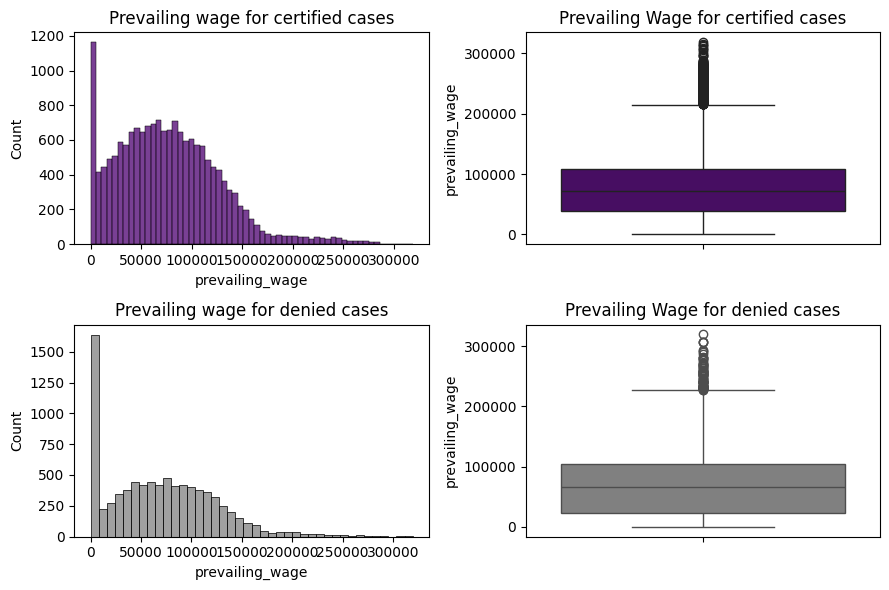

In [ ]:
approved=df[(df["case_status"]=="Certified")]
not_approved=df[(df["case_status"]=="Denied")]

fig, axes = plt.subplots(2, 2, figsize=(9, 6))

sns.histplot(data=approved, x='prevailing_wage', color='#4C0070',  ax=axes[0,0])
axes[0,0].set_title('Prevailing wage for certified cases')
sns.boxplot(y='prevailing_wage', data=approved, color='#4C0070', ax=axes[0,1])
axes[0,1].set_title('Prevailing Wage for certified cases')


sns.histplot(data=not_approved, x='prevailing_wage', color='grey',  ax=axes[1,0])
axes[1,0].set_title('Prevailing wage for denied cases')
sns.boxplot(y='prevailing_wage', data=not_approved, color='grey', ax=axes[1,1])
axes[1,1].set_title('Prevailing Wage for denied cases')

# Adjust the space in between
plt.tight_layout()


plt.show()

In [ ]:
approved=df[(df["case_status"]=="Certified")]
not_approved=df[(df["case_status"]=="Denied")]

print( "Mean prevailing wage for certified cases:", round(approved["prevailing_wage"].mean(),1))
print( "Mean prevailing wage for denied cases:", round(not_approved["prevailing_wage"].mean(),1))


Mean prevailing wage for certified cases: 77293.6
Mean prevailing wage for denied cases: 68748.7


In [ ]:
print("The percentage of difference on prevailing wage between the approved and denied visa's cases is: ",
    (round((approved["prevailing_wage"].mean()-not_approved["prevailing_wage"].mean())/
     (approved["prevailing_wage"].mean() + not_approved["prevailing_wage"].mean())*100)), "%")

The percentage of difference on prevailing wage between the approved and denied visa's cases is:  6 %


In [ ]:
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm

# Assuming 'df' is your original DataFrame
anova_data = data[['prevailing_wage', 'case_status']]

# Convert 'case_status' to numerical if needed
anova_data['case_status'] = anova_data['case_status'].map({'Denied': 0, 'Certified': 1})

# Fit the OLS model
model = sm.ols('case_status ~ prevailing_wage', data=anova_data).fit()

# Get the ANOVA table
anova_table = anova_lm(model)

# Print the ANOVA table
print(anova_table)

                      df       sum_sq    mean_sq           F        PR(>F)
prevailing_wage      1.0    32.814787  32.814787  148.792735  3.963570e-34
Residual         25478.0  5618.924460   0.220540         NaN           NaN


The P-value is 3.96e-34 which is far less than the typical significance level of 0.05; and the F-statistic for the prevailing wage is very large. So there's strong evidence to suggest that prevailing wage has a statistically significant impact on visa approval.

5. Do certain regions in the US have higher visa approval rates compared to others?

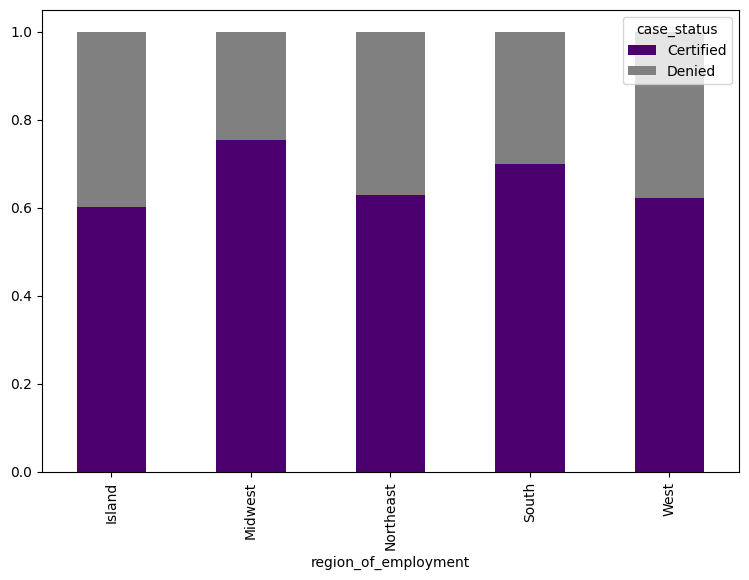

In [ ]:
df["region_of_employment"] = df["region_of_employment"].astype("category")
pd.crosstab(df['region_of_employment'], df['case_status'],normalize='index').plot(kind="bar", figsize=(9,6), stacked=True, color= ['#4C0070', 'grey','#1E90FF', '#000080' ,'#9933FF', '#0000CD', '#CC99FF', '#E6CCFF'])
plt.show()

In [ ]:
pd.crosstab(df['region_of_employment'], df['case_status'],normalize='index')

case_status,Certified,Denied
region_of_employment,,
Island,0.602667,0.397333
Midwest,0.755282,0.244718
Northeast,0.629048,0.370952
South,0.700157,0.299843
West,0.622533,0.377467


Midwest and South have higher the rates compared to the other regions.

6. How does the number of employees in a company influence visa approval? Do larger companies have a higher approval rate?

In [ ]:
approved['no_of_employees'].mean()

np.float64(5807.018157245269)

In [ ]:
not_approved['no_of_employees'].mean()

np.float64(5385.538406995982)

In [ ]:
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm

model = sm.ols('no_of_employees ~ case_status', data=df).fit()

anova_table = anova_lm(model)
print(anova_table)

                  df        sum_sq       mean_sq         F    PR(>F)
case_status      1.0  1.004004e+09  1.004004e+09  1.918306  0.166056
Residual     25478.0  1.333470e+13  5.233808e+08       NaN       NaN


As p-value is greater than 0.05, there is no statistically significant evidence to reject the null hypothesis, meaning there is no significant difference in the number of employees between cases with different visa cases (certified/denied).

7. Are visa approval rates different across various continents of employees? Which continent has the highest and lowest approval rates?

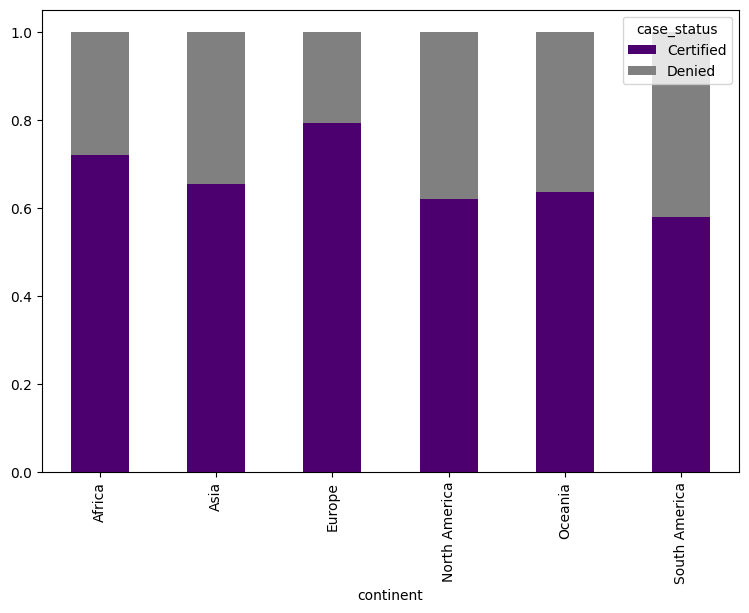

In [ ]:
df["continent"] = df["continent"].astype("category")
pd.crosstab(df['continent'], df['case_status'],normalize='index').plot(kind="bar", figsize=(9,6), stacked=True, color= ['#4C0070', 'grey','#1E90FF', '#000080' ,'#9933FF', '#0000CD', '#CC99FF', '#E6CCFF'])
plt.show()

In [ ]:
pd.crosstab(df['continent'], df['case_status'],normalize='index')

case_status,Certified,Denied
continent,,
Africa,0.720508,0.279492
Asia,0.653105,0.346895
Europe,0.792337,0.207663
North America,0.618773,0.381227
Oceania,0.635417,0.364583
South America,0.578638,0.421362


Europe is the continent with the highest approval rate and South America the lowest.

# **Data Pre-processing**

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

# **Model Building**

In [ ]:
df=df.drop('case_id', axis=1)

In [ ]:
df["case_status"] = df["case_status"].astype("category")

In [ ]:
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Define the columns you want to encode
columns_to_encode = ['continent','has_job_experience',
                     'requires_job_training', 'region_of_employment',
                     'unit_of_wage', 'full_time_position', 'education_of_employee']

# Apply Label Encoding to each column
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])


In [ ]:
anova_data['case_status'] = anova_data['case_status'].map({'Denied': 0, 'Certified': 1})
df['case_status'] = df['case_status'].map({'Denied': 0, 'Certified': 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  int64   
 1   education_of_employee  25480 non-null  int64   
 2   has_job_experience     25480 non-null  int64   
 3   requires_job_training  25480 non-null  int64   
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  int64   
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  int64   
 9   full_time_position     25480 non-null  int64   
 10  case_status            25480 non-null  category
dtypes: category(1), float64(1), int64(9)
memory usage: 2.0 MB


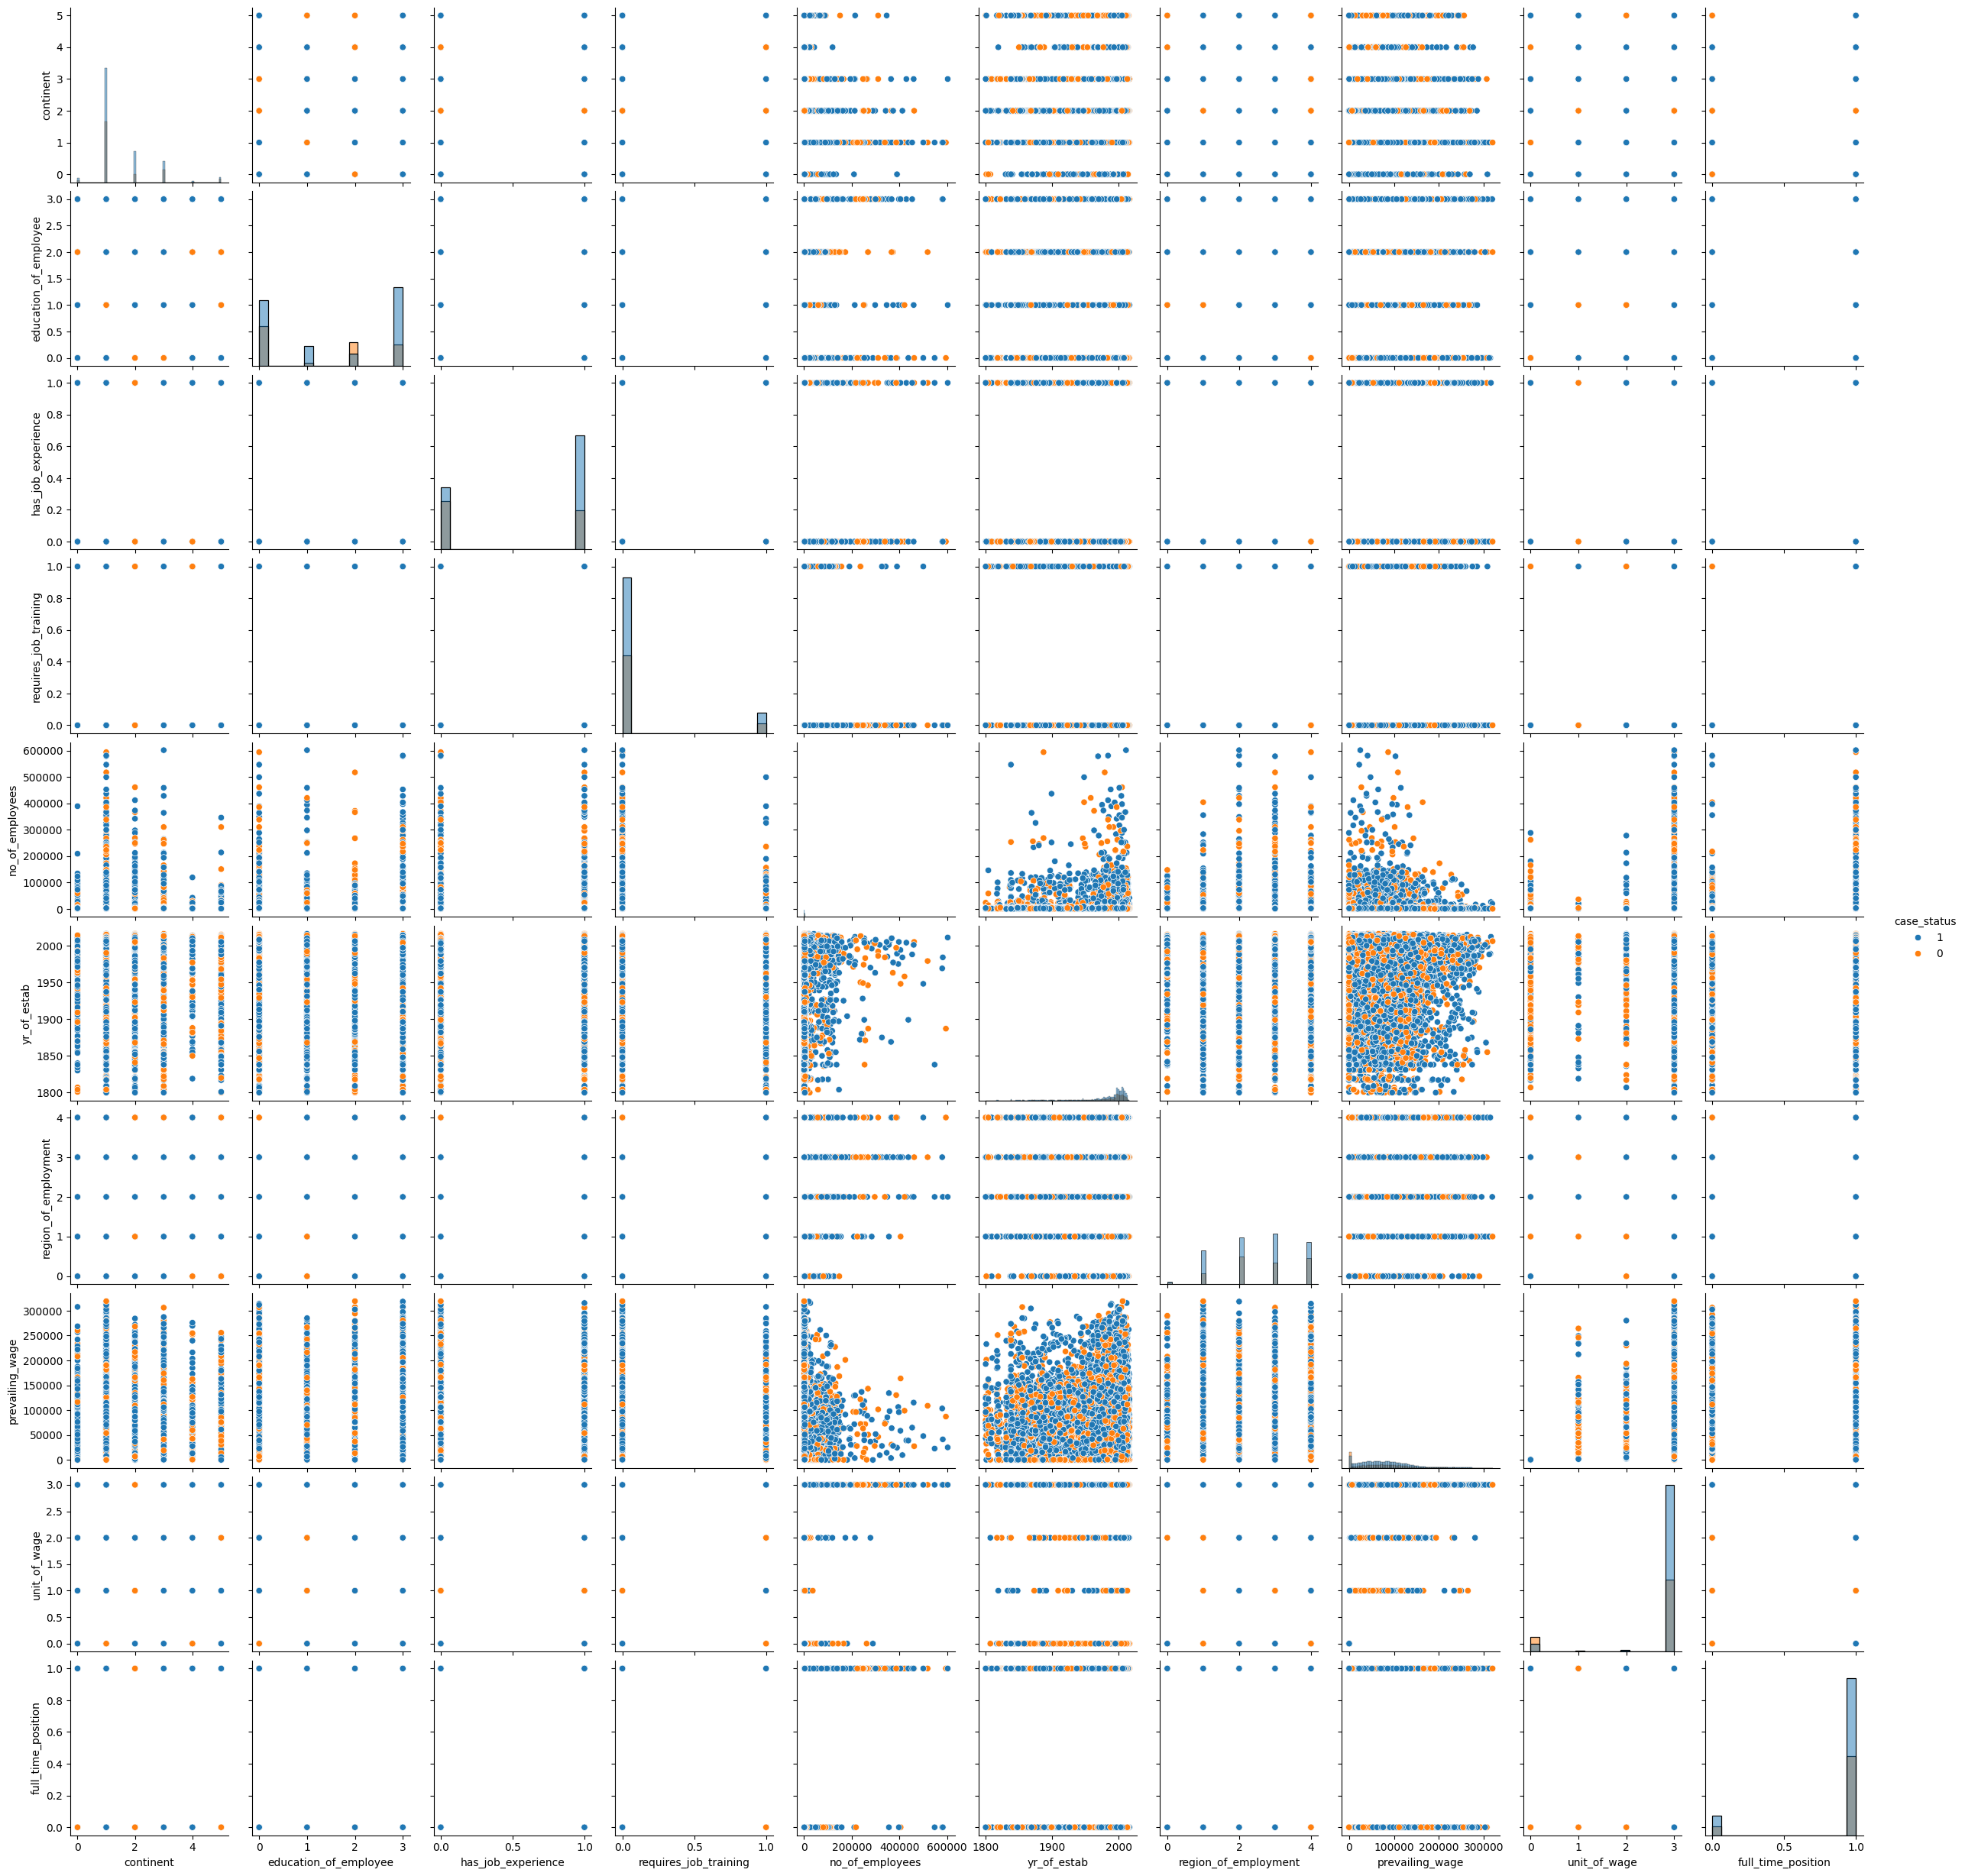

In [ ]:
sns.pairplot(data=df, hue="case_status", diag_kind='hist')

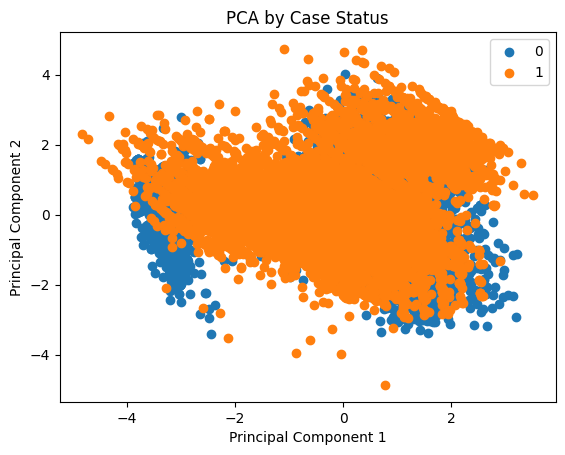

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a pandas DataFrame called 'df'
# and 'case_status' is the column you want to use for grouping

# Select numerical features for PCA
numerical_features = ['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position'] #add more numerical features here

X = df[numerical_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for each case status
pca_results = {}
for status in df['case_status'].unique():
    X_status = X_scaled[df['case_status'] == status]
    pca = PCA(n_components=2) # You can adjust the number of components
    X_pca = pca.fit_transform(X_status)
    pca_results[status] = X_pca

# Now you have the PCA results for each case status in the 'pca_results' dictionary
# You can visualize or further analyze these results

#Example visualization using matplotlib:
import matplotlib.pyplot as plt

for status, X_pca in pca_results.items():
    plt.scatter(X_pca[:,0], X_pca[:,1], label=status)
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA by Case Status")
plt.show()

In [ ]:
X_pca[:,0], X_pca[:,1]

(array([-0.80365376, -1.17287388, -0.40109969, ..., -2.63457391,
         0.95314203, -0.00930262]),
 array([-0.6147427 ,  0.29283123, -0.58343879, ...,  0.29378276,
         1.4077698 , -0.35466326]))

In [ ]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,1,2,0,0,14513,2007,4,592.2029,0,1,0
1,1,3,1,0,2412,2002,2,83425.6500,3,1,1
2,1,0,0,1,44444,2008,4,122996.8600,3,1,0
3,1,0,0,0,98,1897,4,83434.0300,3,1,0
4,0,3,1,0,1082,2005,3,149907.3900,3,1,1


In [ ]:
'''
X = df.drop("case_status", axis=1)
y = df["case_status"]
X = pd.get_dummies(X, drop_first=True)

# Split data into training, validation and test set
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Split data into 2 parts, say temporary and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=42
)
print(X_train.shape, X_val.shape, X_test.shape)
'''

'\nX = df.drop("case_status", axis=1)\ny = df["case_status"]\nX = pd.get_dummies(X, drop_first=True)\n\n# Split data into training, validation and test set\nX_train, X_temp, y_train, y_temp = train_test_split(\n    X, y, test_size=0.2, random_state=1\n)\n\n# Split data into 2 parts, say temporary and test\nX_val, X_test, y_val, y_test = train_test_split(\n    X_temp, y_temp, test_size=0.4, random_state=42\n)\nprint(X_train.shape, X_val.shape, X_test.shape)\n'

# **Model Performance Improvement**

## **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```


In [ ]:
print(df['case_status'].value_counts())

case_status
1    17018
0     8462
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your DataFrame and 'case_status' is your target variable
X = df.drop('case_status', axis=1)
y = df['case_status']

# Initialize SMOTE
smote = SMOTE(random_state=42)  # You can set a random state for reproducibility

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['case_status'] = y_resampled

# Now df_resampled contains the balanced dataset
print(df_resampled['case_status'].value_counts())

case_status
1    17018
0    17018
Name: count, dtype: int64


In [ ]:
def FUN(X):
  ZX=1+X
  ZX2=1+X*2
  return ZX, ZX2
zx,zx2 = FUN(2)
zx=FUN(2)[0]

##    Gradient Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Initialize the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='f1') # Adjust scoring as needed

# Assuming X and y are your features and target variable from df_resampled
X = df_resampled.drop("case_status", axis=1)
y = df_resampled["case_status"]

# Fit GridSearchCV to the data
grid_search.fit(X, y)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_gb_classifier = grid_search.best_estimator_

Best parameters: {'learning_rate': 0.1, 'max_features': 0.7, 'n_estimators': np.int64(50), 'subsample': 0.9}
Best cross-validation score: 0.7411135492922305


##   Adaboost




In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Initialize the AdaBoostClassifier
ab_classifier = AdaBoostClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='f1') # Adjust scoring as needed

# Assuming X and y are your features and target variable from df_resampled
X = df_resampled.drop("case_status", axis=1)
y = df_resampled["case_status"]

# Fit GridSearchCV to the data
grid_search.fit(X, y)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_gb_classifier = grid_search.best_estimator_

Best parameters: {'estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'learning_rate': 0.05, 'n_estimators': np.int64(75)}
Best cross-validation score: 0.7360531092044766


##   Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

# Initialize the AdaBoostClassifier
bg_classifier = BaggingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bg_classifier, param_grid=param_grid, cv=5, scoring='f1') # Adjust scoring as needed

# Assuming X and y are your features and target variable from df_resampled
X = df_resampled.drop("case_status", axis=1)
y = df_resampled["case_status"]

# Fit GridSearchCV to the data
grid_search.fit(X, y)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_bg_classifier = grid_search.best_estimator_

Best parameters: {'max_features': 0.7, 'max_samples': 0.9, 'n_estimators': 70}
Best cross-validation score: 0.7512501792751174


##   Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1') # Adjust scoring as needed

# Assuming X and y are your features and target variable from df_resampled
X = df_resampled.drop("case_status", axis=1)
y = df_resampled["case_status"]

# Fit GridSearchCV to the data
grid_search.fit(X, y)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

Best parameters: {'max_features': 'sqrt', 'max_samples': np.float64(0.5), 'min_samples_leaf': np.int64(3), 'n_estimators': 110}
Best cross-validation score: 0.746823211782909


##  Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='f1') # Adjust scoring as needed

# Assuming X and y are your features and target variable from df_resampled
X = df_resampled.drop("case_status", axis=1)
y = df_resampled["case_status"]

# Fit GridSearchCV to the data
grid_search.fit(X, y)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_dt_classifier = grid_search.best_estimator_

Best parameters: {'max_depth': np.int64(5), 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 1}
Best cross-validation score: 0.7454028571147606


##   XGBoost

In [ ]:
from xgboost import XGBClassifier  # For classification tasks

param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Initialize the XGBClassifier
xg_classifier = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xg_classifier, param_grid=param_grid, cv=5, scoring='f1') # Adjust scoring as needed

# Assuming X and y are your features and target variable from df_resampled
X = df_resampled.drop("case_status", axis=1)
y = df_resampled["case_status"]

# Fit GridSearchCV to the data
grid_search.fit(X, y)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_xg_classifier = grid_search.best_estimator_

Best parameters: {'gamma': 1, 'learning_rate': 0.1, 'n_estimators': np.int64(100), 'scale_pos_weight': 2, 'subsample': 0.9}
Best cross-validation score: 0.7479336301677517


Cross Validation f1 Scores
* Adaboost: 0.736
- DecisionTree: 0.745
- Random Forest: 0.746
- XGBoost: 0.747
- Bagging: 0.751


# **Model Comparison and Final Model Selection**

##Confusion matrix: Bagging

In [ ]:
# Prepare your data (same as before)
X = df_resampled.drop('case_status', axis=1)
y = df_resampled['case_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the BaggingClassifier
bg_classifier = BaggingClassifier( max_features=0.7, max_samples=0.9, n_estimators=70, random_state=42)

#Best parameters: {'max_features': 0.7, 'max_samples': 0.9, 'n_estimators': 70}

# Fit the model
bg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = bg_classifier.predict(X_test)

Confusion Matrix:
[[2558  829]
 [ 817 2604]]


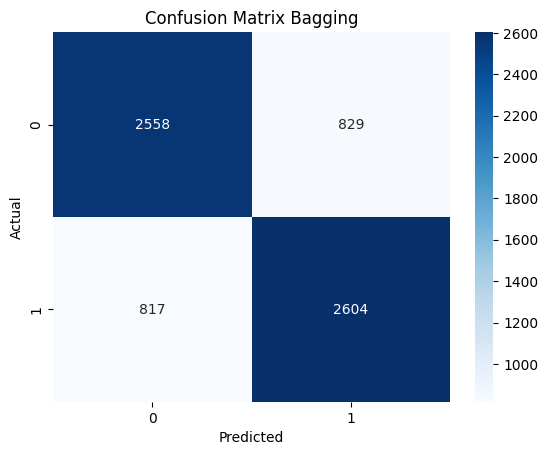

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have y_test (actual labels) and y_pred (predictions)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, you can visualize the confusion matrix using seaborn:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Bagging')
plt.show()

##Confusion matrix: XGBoost

In [ ]:
# Prepare your data (same as before)
X = df_resampled.drop('case_status', axis=1)
y = df_resampled['case_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBClassifier
xg_classifier = XGBClassifier(gamma=1, learning_rate=0.1, n_estimators=100, scale_pos_weight=2, subsample=0.9, random_state=42)

# Fit the model
xg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xg_classifier.predict(X_test)

Confusion Matrix:
[[1992 1395]
 [ 458 2963]]


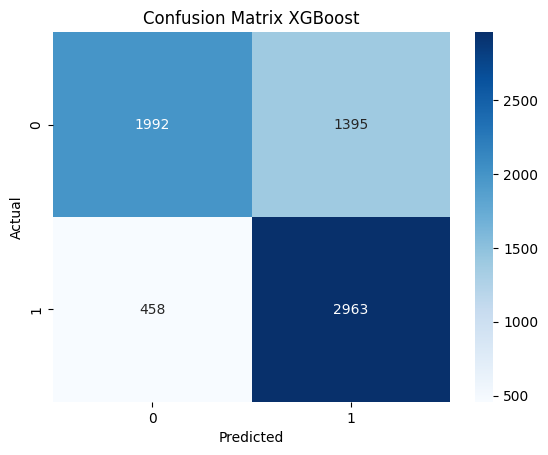

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have y_test (actual labels) and y_pred (predictions)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, you can visualize the confusion matrix using seaborn:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix XGBoost')
plt.show()

##Confusion matrix: Decision Trees

In [ ]:
# Prepare your data (same as before)
X = df_resampled.drop('case_status', axis=1)
y = df_resampled['case_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.0001, min_samples_leaf=1, random_state=42)

# Fit the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

Confusion Matrix Decision Trees:
[[2323 1064]
 [ 715 2706]]


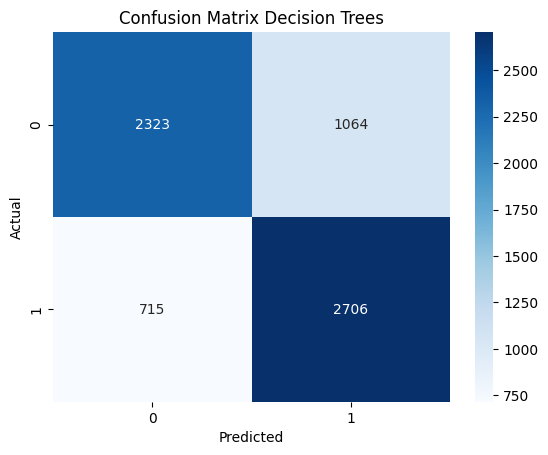

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have y_test (actual labels) and y_pred (predictions)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix Decision Trees:")
print(cm)

# Optionally, you can visualize the confusion matrix using seaborn:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Trees')
plt.show()

##Confusion Matrix: Random Forest

In [ ]:
# Prepare your data (same as before)
X = df_resampled.drop('case_status', axis=1)
y = df_resampled['case_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(max_features='sqrt', max_samples=0.5, min_samples_leaf=3, n_estimators=110, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

Confusion Matrix Random Forest:
[[2462  925]
 [ 740 2681]]


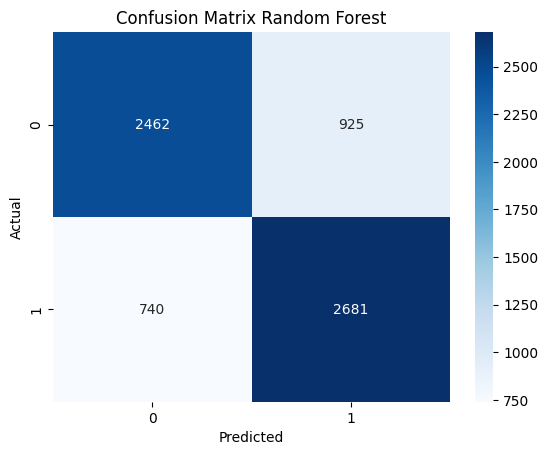

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have y_test (actual labels) and y_pred (predictions)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix Random Forest:")
print(cm)

# Optionally, you can visualize the confusion matrix using seaborn:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')
plt.show()

##Final Model Selection:

* Given the class imbalance found in the EDA, the SMOTE oversampling technique was applied to prevent the model from being biased towards positive classes and thus allowing us to train more balanced models.

* We need to minimize false positives (Predicted:1 , Actual:0) and a balanced model between false positives and false negatives: that would be ****BaggingClassifier****, which also has the higher f1 score (0.75)

# **Actionable Insights and Recommendations**



*   Higher educational attainment and prior professional experience stand out as the strongest individual predictors of visa success. After controlling for continent of origin, applicants holding at least a bachelor’s degree and verifiable work history display a markedly higher approval probability, whereas those from South America show the lowest baseline likelihood relative to Europe and Africa.

* Post‑SMOTE rebalancing, the BaggingClassifier delivers the most favorable trade‑off between Type I (false‑positive) and Type II (false‑negative) errors, achieving an F1‑score of 0.75 while registering the smallest false‑positive rate across all tested algorithms. This makes it the preferred model when the operational cost of approving ineligible cases outweighs the cost of missing eligible ones.



___